<a href="https://colab.research.google.com/github/KashyretsIvanna/ml/blob/main/%D0%9F%D0%A0%D0%9E%D0%93%D0%9D%D0%9E%D0%97%D0%A3%D0%92%D0%90%D0%9D%D0%9D%D0%AF_%D0%9D%D0%90_%D0%9E%D0%A1%D0%9D%D0%9E%D0%92%D0%86_%D0%9A%D0%9B%D0%90%D0%A1%D0%98%D0%A4%D0%86%D0%9A%D0%90%D0%A2%D0%9E%D0%A0%D0%90_%D0%94%D0%95%D0%A0%D0%95%D0%92%D0%90_%D0%A0%D0%86%D0%A8%D0%95%D0%9D%D0%AC_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторна робота 3**



ВИКОРИСТАННЯ ЗГОРТКОВОЇ НЕЙРОННОЇ МЕРЕЖІ CNN
ДЛЯ ЗАДАЧІ КЛАСИФІКАЦІЇ ЗОБРАЖЕНЬ

Виконала студентка КП-41мп

Каширець Іванна

2025












#Завдання

Потрібно використати бібліотеки мови програмування Python для
завантаження, дослідження та аналізу набору даних Fashion-MNIST для задачі
класифікації зображень. Після цього потрібно провести попередню обробку
даних: змінити розміри, масштабувати, перетворити мітки у вектори
кодування та розділити дані на навчальні та тестові набори. Зробивши все це,
потрібно побудувати модель нейронної мережі CNN. Далі потрібно
компілювати, навчити та оцінити побудовану модель, візуалізуючи точність і
графіки втрат.

Потрібно забезпечити уникнення перенавчання моделі, переглянути
свою початкову модель і повторно навчити її. Потрібно оцінити нову модель і
порівняти результати обох моделей. Зробіть прогнози на основі даних тесту,
перетворіть ймовірності у мітки класів і побудуйте кілька тестових зразків, які
модель правильно та неправильно класифікувала. Нарешті, потрібно
візуалізувати звіт про класифікацію, який дасть вам більш глибоку
інформацію про те, який клас був (не)правильно класифікований моделлю.
Дайте відповіді на всі питання, поставені у ході виконання практикуму.

#Реалізація

##Проаналізуйте дані

1) Завантаження даних

In [3]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

2) Проаналізуйе дані

In [4]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


Висновок:

Навчальні дані складаються з 60 000 зображень розміром 28 на 28 пікселів. Це означає, що кожне зображення — це сітка з 28 рядків і 28 стовпців пікселів у відтінках сірого. Для кожного з цих зображень є відповідна мітка — одне число від 0 до 9, яке вказує, яка цифра зображена.

Тестові дані містять 10 000 подібних зображень і міток. Ці зображення не використовуються в процесі навчання моделі, а натомість застосовуються для перевірки її якості — тобто, як добре модель навчилася розпізнавати цифри, які вона раніше не бачила.

Таким чином, розмір навчального набору становить 60 000 зразків, а тестового — 10 000 зразків. Кожен зразок — це окреме зображення цифри у форматі 28×28 пікселів.

3) Знайдіть унікальні номери міток тренувального набору.

In [5]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Висновок: Є десять вихідних класів від 0 до 9.

4) Прогляньте зображення у наборі даних

Text(0.5, 1.0, 'Ground Truth : 9')

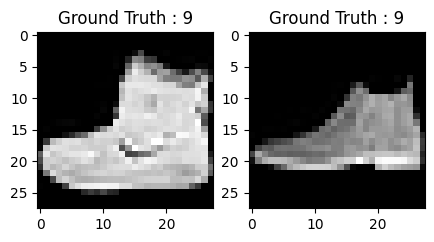

In [6]:
plt.figure(figsize=[5,5])
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Висновок: Результати двох вищевказаних графіків виглядають як ботильйони, і
цьому класу присвоєно мітку класу 9. Аналогічно, інші продукти будуть мати
різні мітки, але подібні продукти будуть мати однакові мітки. Це означає, що
усі 7000 зображень ботильйонів будуть мати мітку класу 9.

##Попередня обробка даних

1) перетворимо кожне зображення тренувального і
тестового набору розміром 28x28 у матрицю розміром 28x28x1, яка подається
в мережу.

In [7]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Висновок:Ці зміни означають, що ви додали нову "канальну" вісь до кожного зображення. Раніше зображення мали форму (28, 28) — тобто були двовимірними (рядки й стовпці пікселів). Тепер кожне зображення має форму (28, 28, 1), де 1 означає один канал, тобто зображення є одноканальним (чорно-білим).

Цей формат є стандартним для подачі зображень у нейронну мережу (зокрема CNN), яка очікує 4-вимірний вхід:
(кількість_зразків, висота, ширина, кількість_каналів)

Отже:

Зберено кількість зразків зразків — 60 000 для навчання та 10 000 для тестування.
Самі зображення не змінено, лише додано вимір, який потрібен для сумісності з глибокими нейронними мережами.

2) перетворимо дані в float32

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

3) перетворимо навчальні та тестові мітки у вектори кодування:

In [9]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Висновок: Раніше мітки класів (тобто правильні відповіді для кожного зображення) були представлені як цілі числа від 0 до 9. Наприклад, мітка 9 означає, що на зображенні зображено цифру 9.

Після перетворення за допомогою функції to_categorical кожна така мітка стала вектором з 10 елементів, де:

Всі елементи — це нулі, крім одного елемента з індексом, що відповідає мітці.

Наприклад, мітка 9 стала вектором [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] — одиниця на 10-й позиції (індекс 9).



4) Розділимо дані та тестову тв тренувальну

In [10]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
train_Y_one_hot, test_size=0.2, random_state=13)

5) Перевіримо форму набору для навчання та перевірки.

In [11]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

Висновок: Це означає, що дані розділено на навчальну та валідаційну частини. Під час тренування нейронної мережі модель навчається на 48 000 зразках (train_X) і одночасно перевіряє, як добре вона працює на валідаційному наборі з 12 000 зразків (valid_X). Це дозволяє відстежувати якість навчання та уникати перенавчання (overfitting).

Також усі мітки вже перетворені у формат one-hot encoding, готовий для використання в нейронній мережі з функцією втрат, наприклад categorical_crossentropy.



##Нейронна мережа. Змоделюйте дані

1) Імпортуємо необхідні бібліотеки

In [13]:
import keras


In [16]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU


In [17]:
batch_size = 64
epochs = 20
num_classes = 10


##Архітектура нейронної мережі

In [19]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))

fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

fashion_model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Висновок: Модель приймає чорно-біле зображення 28x28 пікселів, Використовує кілька згорткових шарів для виділення ознак, Переходить до повнозв’язного шару для класифікації, повертає ймовірності належності до кожного з класів.

##Компіляція моделі


1) Після створення моделі компілюйте її за допомогою оптимізатора Adam,  одного з найпопулярніших алгоритмів оптимізації. Вкажіть тип втрат, який є  категоріальною перехресною ентропією, що використовується для  багатокласової класифікації, також можна використовувати двійкову  перехресну ентропію як функцію втрат. Вкажіть метрику як точність, яку  хочете проаналізувати під час навчання моделі.

In [20]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


2) Вконайте візуалізацію шарів

In [21]:
fashion_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Цей результат показує структуру побудованої згорткової нейронної мережі, яку ми створили за допомогою Keras. Модель має послідовну архітектуру, яка складається з 12 шарів. Кожен шар виконує певну роль у процесі обробки зображення 28×28 пікселів і класифікації його до одного з 10 класів.

Conv2D (32 фільтри) — перший згортковий шар із 32 фільтрами розміром 3×3, який аналізує вхідне зображення. Після нього вихід має форму (28, 28, 32). Цей шар має 320 параметрів, які будуть навчатись.

LeakyReLU — додає нелінійність до моделі. Параметрів для навчання не має.

MaxPooling2D — зменшує розмір зображення вдвічі, до (14, 14, 32).

Conv2D (64 фільтри) — другий згортковий шар із виходом (14, 14, 64) і 18,496 параметрами.

LeakyReLU — знову вводить нелінійність, без параметрів.

MaxPooling2D — зменшує розмір до (7, 7, 64).

Conv2D (128 фільтрів) — третій згортковий шар із виходом (7, 7, 128) і 73,856 параметрами.

LeakyReLU — нелінійна активація.

MaxPooling2D — ще раз зменшує розмір до (4, 4, 128).

Flatten — перетворює 3D-вихід у 1D-вектор з 2048 елементів.

Dense (128 нейронів) — щільний шар з 128 нейронами та 262,272 параметрами. Тут модель починає "розуміти" ознаки зображень на абстрактному рівні.

LeakyReLU — нелінійна функція активації.

Dense (10 нейронів) — фінальний шар, який відповідає за класифікацію на 10 класів. Має 1,290 параметрів, а на виході дає ймовірності для кожного класу.

##Тренування моделі

In [23]:
fashion_train = fashion_model.fit(train_X, train_label,
batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
  4/750 ━━━━━━━━━━━━━━━━━━━━ 2:12 178ms/step - accuracy: 0.8910 - loss: 0.2769

KeyboardInterrupt: 

# Висновок



У ході роботи було проведено аналіз набору даних про пасажирів «Титаніка» та побудовано модель дерева рішень для передбачення виживання.

Основні результати:

Найбільш значущою ознакою для класифікації виявився гендер, що підтверджує історичні дані про рятування жінок і дітей у першу чергу.
Дерево рішень показало логічну структуру розбиття, де наступними важливими ознаками стали вік, клас каюти та вартість квитка.
Усього вхідний набір містив 1308 записів, з яких були відсутні дані про вік у 263 записах.
Після розділення вибірки на тренувальну (60%) і тестову (40%), модель показала наступні результати:

Training accuracy = 82.0%
Testing accuracy = 80.5%
Це означає, що модель добре узагальнює результати і не має значного перенавчання.

Можливі покращення:
Додавання нових ознак (наприклад, об'єднання сімей, аналіз місця посадки).
Тонке налаштування гіперпараметрів (глибина дерева, мінімальна кількість зразків у вузлах тощо).
Спроба інших алгоритмів, таких як RandomForestClassifier або GradientBoostingClassifier, які можуть дати вищу точність.
Загалом, отримана модель є інформативною, узгоджується з логічними припущеннями та може бути використана для подальших покращень.

# Питання для самоперевірки






**1. Дайте визначення методу дерев рішень (decision trees).**
Метод дерев рішень (decision trees) – це алгоритм машинного навчання, який
використовується для класифікації та регресії. Він побудований у вигляді дерева, д
е кожна вершина відповідає умовам поділу на основі певної ознаки, а кінцеві гілки дерева (листи)
містять відповідні класи або значення. Дерева рішень використовуються для прийняття рішень, коли
потрібно класифікувати дані або передбачити числові значення.

**2. Як будуються та використовуються бінарні дерева?** Наведіть приклад.
Будова та використання бінарних дерев: Бінарне дерево – це дерево, де кожен вузол має не більше
двох нащадків. Це зручна структура для реалізації алгоритмів сортування, пошуку або аналізу даних.
Наприклад, бінарне дерево пошуку (Binary Search Tree, BST) зберігає елементи так, що для кожного вузла
елементи в лівому піддереві менші за значення вузла, а елементи в правому – більші. Використовується
для швидкого пошуку елементів.

**3. Які існують переваги методу дерева рішень?**
Переваги методу дерева рішень:
Легко інтерпретується і візуалізується.
Не вимагає масштабування даних.
Може працювати з як числовими, так і категоріальними ознаками.
Швидко навчається та здатне працювати з великими обсягами даних.
Можна використовувати для задач класифікації та регресії.

**4. Які існують критерії розщеплення дерева рішень?**
Критерії розщеплення дерева рішень:
Інформаційний приріст (Information Gain): Використовується в ID3 та C4.5 для визначення, який атрибут найбільше зменшує невизначеність.
Gini impurity: Використовується в CART (Classification and Regression Trees), вимірює ступінь чистоти підмножини.
Коефіцієнт ентропії: Використовується для вимірювання нерівномірності даних у вузлі.

**5. Які існують варіанти зупинки навчання дерева рішень?**
Варіанти зупинки навчання дерева рішень:
Досягнення максимального глибини дерева.
Якщо кількість елементів у вузлі менша за мінімальний поріг.
Якщо розщеплення більше не зменшує непевність.
Якщо дерево досягає мінімальної кількості змін у розщепленнях.

**6. Які інструменти Python використовуються для побудови дерева рішень?**
Інструменти Python для побудови дерева рішень:
Scikit-learn: Бібліотека для машинного навчання, яка включає реалізацію дерева рішень в класі DecisionTreeClassifier для класифікації та DecisionTreeRegressor для регресії.
XGBoost: Покращений варіант алгоритму дерева рішень, оптимізований для високої продуктивності.
Graphviz: Для візуалізації дерева рішень.

**7. Як реалізовується оцінка моделі класифікатора дерева рішень?**
Оцінка моделі класифікатора дерева рішень: Оцінка моделі дерева рішень зазвичай включає такі метрики:
Точність (accuracy): Частка правильних прогнозів серед усіх прогнозів.
Матриця сплутаності (confusion matrix): Для оцінки кількості істинно позитивних, істинно негативних, хибно позитивних і хибно негативних прогнозів.
F1-міра: Враховує як точність, так і відгук, особливо корисно для незбалансованих класів.
AUC-ROC: Площу під кривою прийняття характеристик (Receiver Operating Characteristic) для класифікаційних задач.